In [1]:
import featurization
import helpers

import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import contextily as ctx
from shapely.geometry import Point, Polygon

%load_ext autoreload
%autoreload 2

In [159]:
import numpy as np
import datetime
import seaborn as sns

In [53]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [41]:
geodf = featurization.all_featurization("all-sc-bike-data-1101.csv")

Dropping 1 entries where end time was before start time


In [42]:
geodf[geodf.idle_time < datetime.timedelta()]

,bike_id,lat,lon,idle_time,batt_start,batt_end,utc_time_start,utc_time_end,local_time_start,day_of_week,time_of_day,gets_pickedup_charged,gets_pickedup_not_charged,in_charger,next_action,geolocation,ZONING,GEOID_Data,pop_density,people_per_house


(array([  1.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   4.,   0.,
          0.,   1.,   0.,   2.,   1.,   0.,   3.,   1.,   2.,   0.,   3.,
          0.,   0.,   2.,   0.,   1.,   0.,   2.,   3.,   1.,   1.,   0.,
          5.,   3.,  24., 227.,  19.,  13.,   4.,   9.,   5., 196.,  10.,
          9., 185.,  38.,  22., 165.,  13., 157., 125.,  56., 136., 152.,
        130., 117., 155., 169., 157., 158., 188., 199., 187., 197., 193.,
        256., 221., 234., 264., 222., 246., 261., 229., 251., 239., 236.,
        214., 208., 172., 198., 199., 167., 146., 123., 139., 113., 114.,
        113., 100., 122., 112.,  95., 135., 131., 132., 113.,  92.,  91.,
         48.]),
 array([ 0.        ,  0.11362788,  0.22725577,  0.34088365,  0.45451154,
         0.56813942,  0.6817673 ,  0.79539519,  0.90902307,  1.02265095,
         1.13627884,  1.24990672,  1.36353461,  1.47716249,  1.59079037,
         1.70441826,  1.81804614,  1.93167403,  2.04530191,  2.15892979,
         2.27255768,  2.38

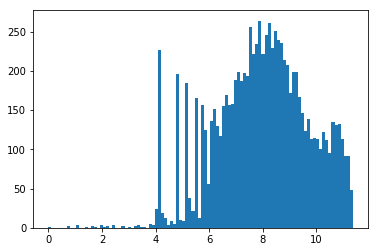

In [25]:
plt.hist(np.log(geodf.idle_time.dt.seconds), bins=100)

In [8]:
geodf.idle_time.describe()

count                     10483
mean     0 days 02:37:05.716588
std      0 days 05:42:47.459912
min           -1 days +23:59:47
25%             0 days 00:07:02
50%             0 days 00:38:09
75%      0 days 02:16:40.500000
max             7 days 14:14:31
Name: idle_time, dtype: object

In [28]:
geodf.next_action.unique()

array(['rented', 'gets_pickedup_charged', 'gets_relocated'], dtype=object)

In [29]:
pickups = geodf[geodf.next_action == 'gets_pickedup_charged']

In [31]:
pickups.describe()

,lat,lon,idle_time,batt_start,batt_end,day_of_week,time_of_day,pop_density,people_per_house
count,803.000000,803.000000,803,803.000000,803.000000,803.000000,803.000000,8.030000e+02,803.000000
mean,36.972403,-122.026326,0 days 04:22:00.092154,38.917808,38.977584,2.815691,14.190535,1.428857e+06,inf
std,0.010969,0.021295,0 days 09:17:54.309641,15.832768,16.267158,1.788967,5.402716,1.052621e+06,NaN
min,36.948770,-122.067530,0 days 00:00:04,2.000000,2.000000,0.000000,0.000000,7.925528e+04,1.000000
25%,36.964915,-122.037055,0 days 00:25:31,28.000000,28.000000,1.000000,11.000000,4.395997e+05,1.680000
50%,36.972240,-122.026610,0 days 01:15:16,33.000000,33.000000,3.000000,15.000000,1.557911e+06,2.076923
75%,36.980820,-122.018025,0 days 04:45:15.500000,45.000000,45.000000,4.000000,18.000000,1.760779e+06,2.470588
max,37.002400,-121.764850,7 days 14:14:31,92.000000,100.000000,6.000000,23.000000,7.756200e+06,inf


In [32]:
relocations = geodf[geodf.next_action == 'gets_relocated']

In [33]:
relocations.describe()

,lat,lon,idle_time,batt_start,batt_end,day_of_week,time_of_day,pop_density,people_per_house
count,1200.000000,1200.000000,1200,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03,1199.000000
mean,36.972327,-122.027360,0 days 02:34:48.062500,63.721667,63.900833,2.858333,14.535000,1.432392e+06,inf
std,0.010214,0.016934,0 days 05:08:53.690577,21.741929,21.631634,1.789115,5.354531,9.228544e+05,NaN
min,36.944550,-122.079130,0 days 00:00:02,2.000000,2.000000,0.000000,0.000000,0.000000e+00,1.066667
25%,36.965175,-122.036317,0 days 00:09:07,45.000000,46.000000,2.000000,12.000000,6.217898e+05,1.680000
50%,36.971825,-122.026655,0 days 00:40:31,64.000000,65.000000,2.000000,15.000000,1.557911e+06,2.111111
75%,36.979280,-122.020305,0 days 02:18:19,82.000000,82.000000,4.000000,18.000000,1.769134e+06,2.365385
max,37.017160,-121.952970,2 days 23:11:26,100.000000,100.000000,6.000000,23.000000,7.756200e+06,inf


In [36]:
rentals = geodf[geodf.next_action == 'rented']

In [37]:
rentals.describe()

,lat,lon,idle_time,batt_start,batt_end,day_of_week,time_of_day,pop_density,people_per_house
count,7186.000000,7186.000000,7186,7186.000000,7186.000000,7186.000000,7186.000000,7.186000e+03,7184.000000
mean,36.971934,-122.027055,0 days 02:54:02.651127,62.339688,62.052881,2.775397,14.237963,1.458667e+06,inf
std,0.010149,0.016635,0 days 05:38:49.056012,19.489175,19.470206,1.813484,5.382632,9.813050e+05,NaN
min,36.932040,-122.069270,0 days 00:00:01,23.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,36.965023,-122.036737,0 days 00:15:15,46.000000,46.000000,1.000000,11.000000,6.217898e+05,1.657143
50%,36.971450,-122.026285,0 days 00:50:46.500000,62.000000,62.000000,2.000000,15.000000,1.557911e+06,2.076923
75%,36.978720,-122.019153,0 days 02:43:55.250000,79.000000,78.000000,4.000000,18.000000,1.794198e+06,2.365385
max,37.013710,-121.923070,6 days 06:10:03,100.000000,100.000000,6.000000,23.000000,7.756200e+06,inf


In [34]:
out_of_service_area = geodf[geodf.ZONING == 'out']

In [35]:
out_of_service_area.describe()

,lat,lon,idle_time,batt_start,batt_end,day_of_week,time_of_day,pop_density,people_per_house
count,293.000000,293.000000,293,293.000000,293.000000,293.000000,293.000000,2.930000e+02,290.000000
mean,36.977121,-121.985094,0 days 05:06:43.825938,55.832765,55.573379,2.761092,14.334471,1.521260e+06,2.788431
std,0.010728,0.028896,0 days 08:16:29.738859,18.374044,18.650872,1.866500,4.804116,1.050448e+06,2.407584
min,36.932040,-122.079130,0 days 00:00:08,2.000000,2.000000,0.000000,0.000000,0.000000e+00,1.000000
25%,36.968780,-121.995070,0 days 00:26:38,41.000000,40.000000,1.000000,12.000000,5.953946e+05,1.866667
50%,36.976390,-121.983910,0 days 01:15:14,54.000000,54.000000,3.000000,15.000000,1.667544e+06,2.437500
75%,36.985060,-121.966440,0 days 06:44:05,70.000000,70.000000,4.000000,18.000000,2.188350e+06,2.833333
max,37.017160,-121.764850,2 days 22:29:29,99.000000,99.000000,6.000000,23.000000,7.756200e+06,23.625000


In [43]:
df = geodf[geodf.next_action != 'gets_pickedup_charged']

In [144]:
X = df[['day_of_week', 'time_of_day', 'ZONING', 'pop_density', 'GEOID_Data']]
X = pd.get_dummies(X, columns=['ZONING'], prefix='zone')
X = pd.get_dummies(X, columns=['GEOID_Data'], prefix='blockgroup')
y = np.log(df['idle_time'].dt.seconds)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [145]:
lrmodel = LinearRegression()
lrmodel.fit(X_train, y_train)
print(lrmodel.score(X_train, y_train))
print(lrmodel.score(X_test, y_test))

0.09156065318285489
-2.1067297733176292e+20


In [146]:
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)
print(rfmodel.score(X_train, y_train))
print(rfmodel.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.09012712143098245
0.06940695783418782


In [147]:
gbmodel = GradientBoostingRegressor()
gbmodel.fit(X_train, y_train)
print(gbmodel.score(X_train, y_train))
print(gbmodel.score(X_test, y_test))

0.07763055856178336
0.06899687984563962


In [58]:
y_class = geodf['idle_time'].dt.seconds/360 > 12

In [59]:
X_train, X_test, yc_train, yc_test = train_test_split(X, y_class, test_size=0.2)

In [60]:
lrmodel = LogisticRegression()
lrmodel.fit(X_train, yc_train)
print(lrmodel.score(X_train, yc_train))
print(lrmodel.score(X_test, yc_test))

0.5814174942184737
0.559847660500544


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [61]:
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train, yc_train)
print(rfmodel.score(X_train, yc_train))
print(rfmodel.score(X_test, yc_test))

0.9730648891307305
0.6512513601741022


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [62]:
gbmodel = GradientBoostingClassifier()
gbmodel.fit(X_train, yc_train)
print(gbmodel.score(X_train, yc_train))
print(gbmodel.score(X_test, yc_test))

0.7028975649571487
0.6583242655059848


In [63]:
gbmodel.feature_importances_

array([8.22003945e-02, 1.07596780e-01, 3.89148425e-01, 1.46670165e-01,
       1.43690864e-02, 1.04845553e-01, 3.55683536e-03, 1.70444828e-02,
       9.13179744e-03, 5.45575083e-04, 2.83994648e-03, 2.42279699e-03,
       0.00000000e+00, 7.15520955e-03, 6.58471927e-03, 3.11810349e-03,
       8.57494412e-03, 3.07108813e-04, 2.96704812e-03, 0.00000000e+00,
       0.00000000e+00, 9.43503047e-04, 0.00000000e+00, 2.65649155e-02,
       0.00000000e+00, 2.71814566e-02, 2.38259492e-02, 0.00000000e+00,
       0.00000000e+00, 4.77500137e-03, 0.00000000e+00, 6.42676850e-04,
       0.00000000e+00, 6.98752586e-03])

In [64]:
X_train.columns

Index(['batt_start', 'day_of_week', 'time_of_day', 'pop_density', 'zone_CB',
       'zone_CBD', 'zone_CBD-E', 'zone_CC', 'zone_CD/R', 'zone_CN', 'zone_CT',
       'zone_EA-20', 'zone_FP', 'zone_IG', 'zone_IG/PER', 'zone_IG/PER2',
       'zone_OFR', 'zone_PA', 'zone_PF', 'zone_PF/PK', 'zone_PK', 'zone_PK/PF',
       'zone_R-1-10', 'zone_R-1-5', 'zone_R-1-7', 'zone_RL', 'zone_RM',
       'zone_RS-1A', 'zone_RTA', 'zone_RTB', 'zone_RTC', 'zone_RTD',
       'zone_RTE', 'zone_out'],
      dtype='object')

In [90]:
df['idle'] = df.idle_time.dt.seconds/60

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
blockgrouped = df.groupby(by='GEOID_Data', axis=0)

In [198]:
bg_mean_idles = blockgrouped.idle_minutes.median()

In [102]:
b = geopandas.read_file('tl_2016_06_bg')
b.crs = {'init':'epsg:4269'}

In [112]:
blockgroupdf = geopandas.read_file('ACS_2016_5YR_BG_06_CALIFORNIA.gdb', driver='FileGDB', layer='ACS_2016_5YR_BG_06_CALIFORNIA')

In [113]:
b = b.merge(blockgroupdf[['GEOID', 'GEOID_Data']], on="GEOID")

In [199]:
bg_mean_idles = bg_mean_idles.reset_index()

In [200]:
mean_idles = b.merge(bg_mean_idles, how='inner', on="GEOID_Data")

In [201]:
mean_idles = mean_idles[mean_idles.GEOID != '060879901000']

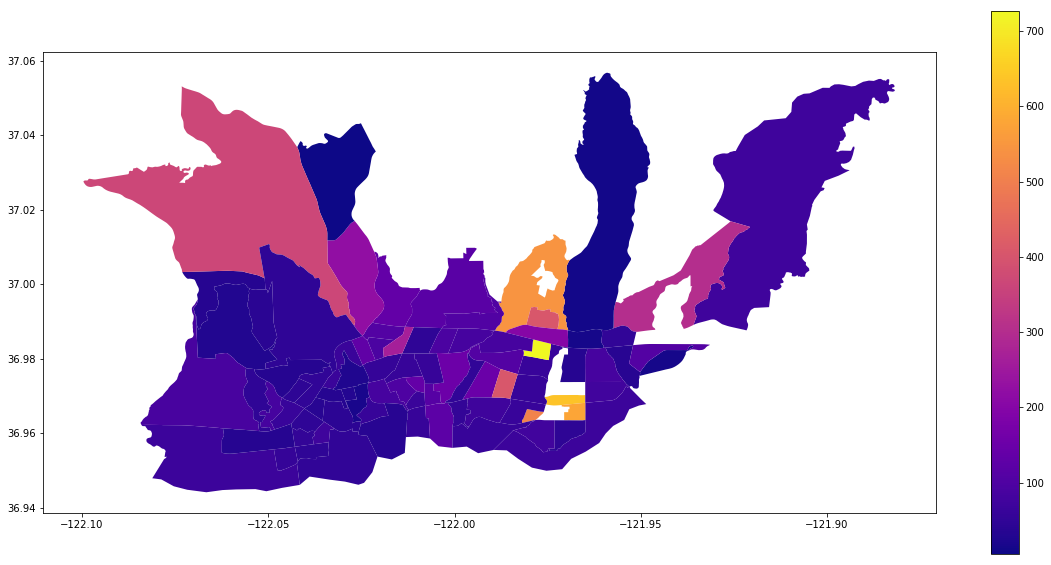

In [202]:
fig, ax = plt.subplots(1, figsize=(20, 10))
mean_idles.plot(ax = ax, column='idle_minutes', legend = True, cmap='plasma')

In [135]:
bg_count_idles = blockgrouped.idle_minutes.count()
bg_count_idles = bg_count_idles.reset_index()

In [136]:
count_idles = b.merge(bg_count_idles, how='inner', on="GEOID_Data")
count_idles = count_idles[count_idles.GEOID != '060879901000']

0     Annotation(-122.064, 36.9522, '191')
1      Annotation(-122.052, 36.9913, '53')
2      Annotation(-122.03, 36.9529, '275')
3      Annotation(-122.02, 36.9776, '184')
4       Annotation(-121.965, 36.9851, '4')
5      Annotation(-122.06, 36.9876, '131')
6       Annotation(-121.977, 36.9785, '9')
7        Annotation(-121.97, 36.9689, '2')
8       Annotation(-121.954, 36.9783, '1')
9      Annotation(-122.017, 36.9965, '35')
10     Annotation(-122.063, 36.9989, '50')
11       Annotation(-121.913, 37.024, '1')
12      Annotation(-121.939, 37.0003, '2')
13     Annotation(-122.019, 36.9872, '99')
14    Annotation(-122.024, 36.9823, '174')
15     Annotation(-122.02, 36.9832, '149')
16    Annotation(-122.044, 36.9759, '113')
17     Annotation(-122.049, 36.9671, '57')
18    Annotation(-122.038, 36.9725, '173')
19     Annotation(-122.045, 36.9651, '95')
20     Annotation(-122.042, 36.9714, '46')
21      Annotation(-122.03, 36.979, '181')
22    Annotation(-122.067, 36.9705, '133')
23     Anno

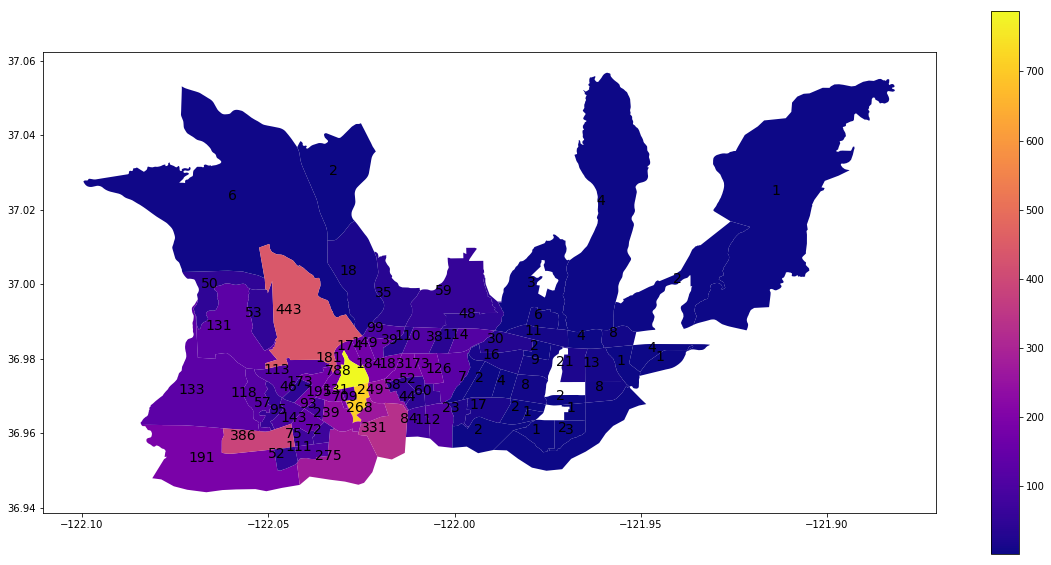

In [139]:
fig, ax = plt.subplots(1, figsize=(20, 10))
count_idles.plot(ax = ax, column='idle_minutes', legend = True, cmap='plasma')
count_idles.apply(lambda x: ax.annotate(s=x['idle_minutes'], xy=x.geometry.centroid.coords[0], ha='right', size=14),axis=1)

In [203]:
m2 = mean_idles[count_idles.idle_minutes > 25]

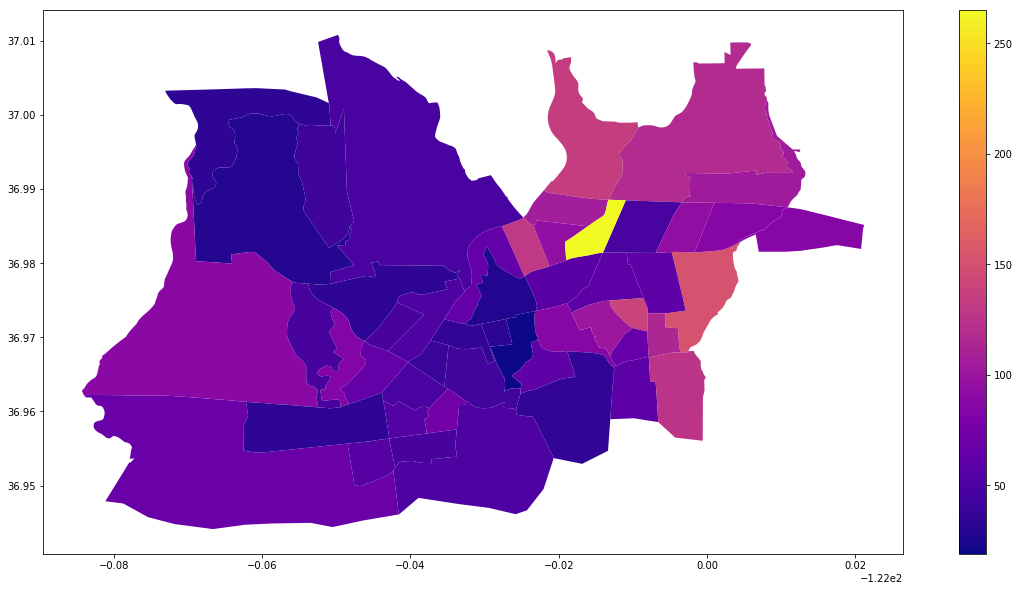

In [204]:
fig, ax = plt.subplots(1, figsize=(20, 10))
m2.plot(ax = ax, column='idle_minutes', legend = True, cmap='plasma')

In [153]:
reduced_GEOID = m2.GEOID_Data.unique()

In [148]:
bg_std_idles = blockgrouped.idle_minutes.std()

In [149]:
bg_std_idles

GEOID_Data
15000US060871001001    380.290806
15000US060871001002    460.043037
15000US060871002001    270.886738
15000US060871002002    350.784465
15000US060871002003    304.670052
15000US060871002004    332.718549
15000US060871002005    352.259548
15000US060871002006    312.129331
15000US060871002007    378.219017
15000US060871003001    284.938625
15000US060871003002    129.624085
15000US060871004001    188.727674
15000US060871004002    189.443525
15000US060871004003    173.937756
15000US060871005001    230.443222
15000US060871005002    168.563500
15000US060871005003    211.048819
15000US060871006001    164.518556
15000US060871006002    175.834370
15000US060871006003    241.311650
15000US060871007001    287.779759
15000US060871007002    117.097755
15000US060871008001    244.675305
15000US060871008002    303.037638
15000US060871008003    340.896506
15000US060871008004    296.991145
15000US060871008005    378.510755
15000US060871008006    301.387027
15000US060871009001    431.947144
150

In [158]:
df_reduced = df[df.GEOID_Data.isin(reduced_GEOID)]

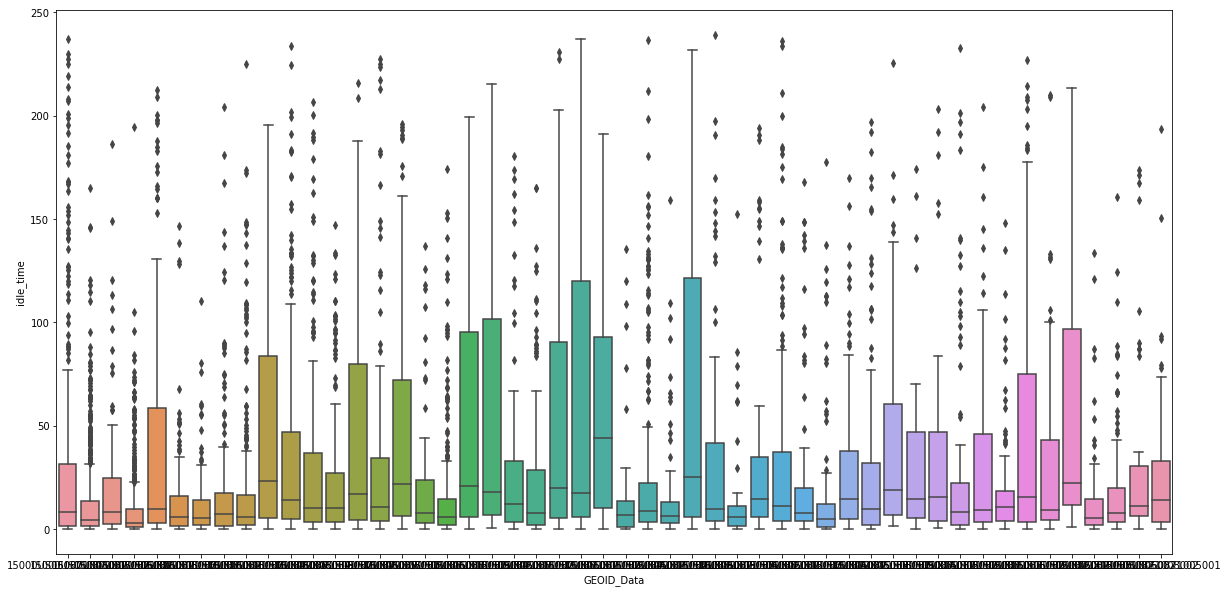

In [163]:
fig, ax = plt.subplots(1, figsize=(20, 10))
sns.boxplot(x=df_reduced['GEOID_Data'], y=df_reduced['idle_time'].dt.seconds/360, ax=ax)

In [165]:
block_timeofday = df_reduced.groupby(by=['GEOID_Data', 'time_of_day'], axis=0)

In [172]:
btod = block_timeofday.bike_id.count().reset_index()
btod = b.merge(btod, how='inner', on="GEOID_Data")
btod = btod[btod.GEOID != '060879901000']

In [182]:
btod9 = btod[btod.time_of_day == 9]
btod16 = btod[btod.time_of_day == 16]
btod7 = btod[btod.time_of_day == 7]
btod12 = btod[btod.time_of_day == 12]
btod19 = btod[btod.time_of_day == 19]

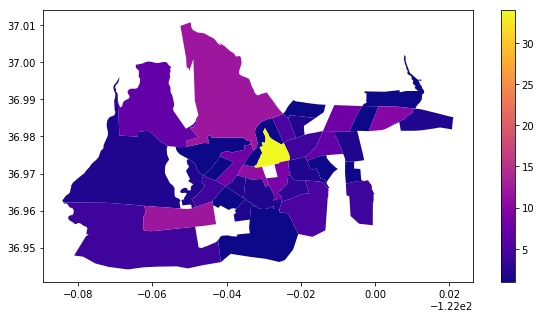

In [179]:
fig, ax = plt.subplots(1, figsize=(10, 5))
btod7.plot(ax = ax, column='bike_id', legend = True, cmap='plasma')

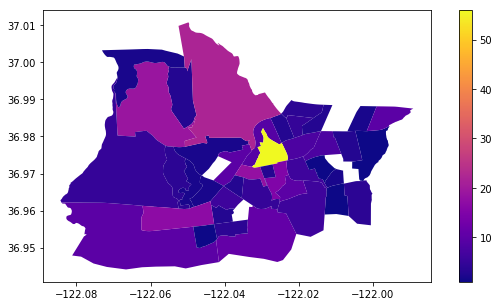

In [177]:
fig, ax = plt.subplots(1, figsize=(10, 5))
btod9.plot(ax = ax, column='bike_id', legend = True, cmap='plasma')

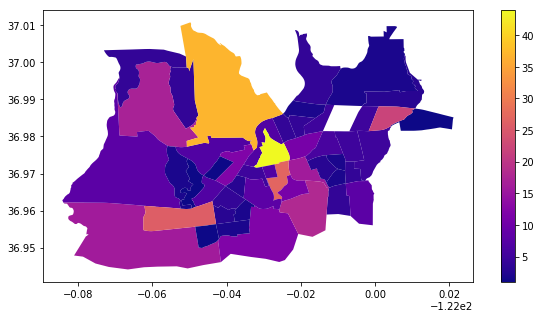

In [181]:
fig, ax = plt.subplots(1, figsize=(10, 5))
btod12.plot(ax = ax, column='bike_id', legend = True, cmap='plasma')

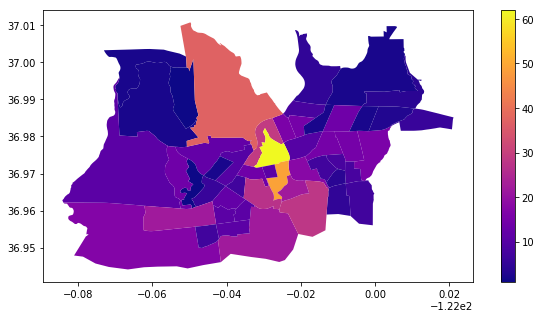

In [178]:
fig, ax = plt.subplots(1, figsize=(10, 5))
btod16.plot(ax = ax, column='bike_id', legend = True, cmap='plasma')

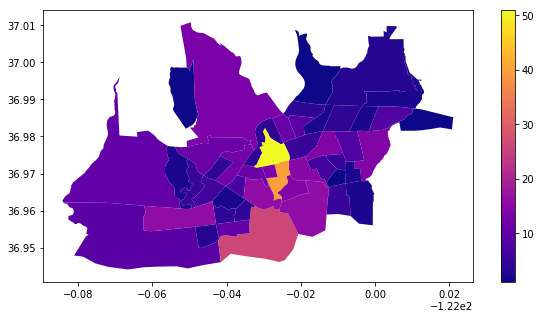

In [197]:
fig, ax = plt.subplots(1, figsize=(10, 5))
btod19.plot(ax = ax, column='bike_id', legend = True, cmap='plasma')

In [184]:
w, s, e, n = btod.total_bounds
img, ext = ctx.bounds2img(w, s, e, n, 15, ll=True)

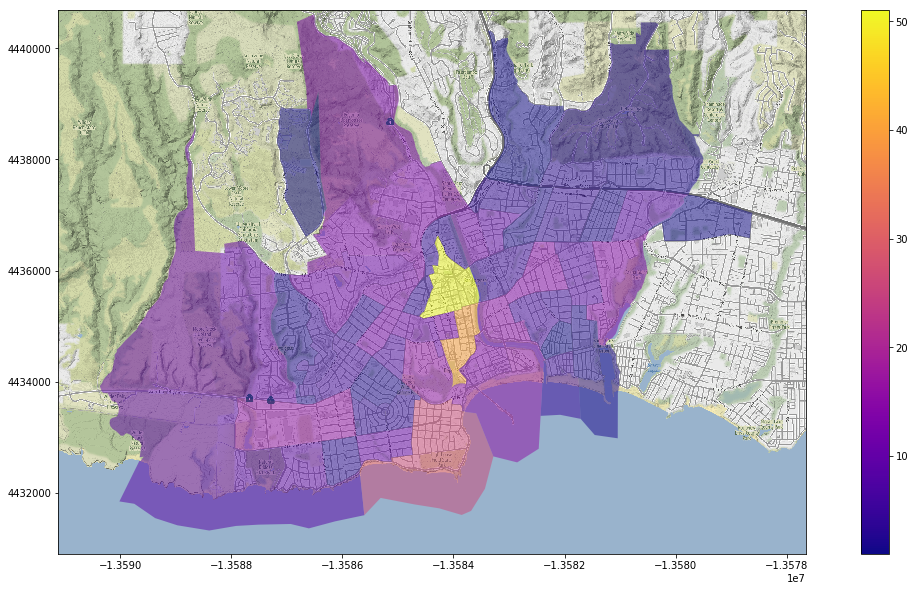

In [196]:
fig, ax = plt.subplots(1, figsize=(20, 10))
new_crs_bike = btod19.to_crs(epsg=3857)
#helpers.map_bikes(ax, btod19, 'bike_id')
ax.imshow(img, extent=ext)
new_crs_bike.plot(ax = ax, column='bike_id', legend = True, cmap='plasma', alpha=0.5)


In [191]:
btod19.crs

{'init': 'epsg:4269'}

In [205]:
b = geopandas.read_file('map.osm')

In [207]:
b

,osm_id,name,highway,waterway,aerialway,barrier,man_made,z_order,other_tags,geometry
0,10547625,Lincoln Street,tertiary,None,None,None,None,4,"""tiger:cfcc""=>""A41"",""tiger:county""=>""Santa Cru...","LINESTRING (-122.0304712 36.9717987, -122.0303..."
1,10547630,Highland Avenue,secondary,None,None,None,None,6,"""cycleway""=>""lane"",""incline""=>""up"",""tiger:cfcc...","LINESTRING (-122.0326553 36.9762701, -122.0327..."
2,10547712,Sewage Treatment Plant,service,None,None,None,None,0,"""service""=>""driveway"",""surface""=>""paved"",""tige...","LINESTRING (-122.0353757 36.9637905, -122.0349..."
3,10547816,None,service,None,None,None,None,0,"""access""=>""private"",""tiger:cfcc""=>""A74"",""tiger...","LINESTRING (-122.0370658 36.9625155, -122.0381..."
4,10547949,None,motorway_link,None,None,None,None,9,"""bicycle""=>""no"",""oneway""=>""yes"",""tiger:cfcc""=>...","LINESTRING (-122.0250518 36.9864233, -122.0251..."
5,10548122,Alley 2590,service,None,None,None,None,0,"""tiger:cfcc""=>""A41"",""tiger:county""=>""Santa Cru...","LINESTRING (-122.0362772 36.9632798, -122.0353..."
6,10548281,None,service,None,None,None,None,0,"""tiger:cfcc""=>""A41"",""tiger:county""=>""Santa Cru...","LINESTRING (-122.0117933 36.9852571, -122.0120..."
7,10548438,Rose Alley,service,None,None,None,None,0,"""service""=>""alley"",""tiger:cfcc""=>""A41"",""tiger:...","LINESTRING (-122.0321836 36.9715914, -122.0321..."
8,10548561,Alley 1021,service,None,None,None,None,0,"""service""=>""alley"",""tiger:cfcc""=>""A41"",""tiger:...","LINESTRING (-122.0100249 36.9696936, -122.0103..."
9,10548563,Alley 1015,service,None,None,None,None,0,"""service""=>""alley"",""tiger:cfcc""=>""A41"",""tiger:...","LINESTRING (-122.0105956 36.9708209, -122.0104..."
